# Develop cat dog image classification using CNN

# Steps
1. Load your data
2. Data proper structure
3. Loading training data and test data from directory
4. Create CNN model.
5. Compile, run, evaluate the model

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN_FILES_DS_US/training_set.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN_FILES_DS_US/test_set.zip")
zip_ref.extractall('/content')
zip_ref.close()

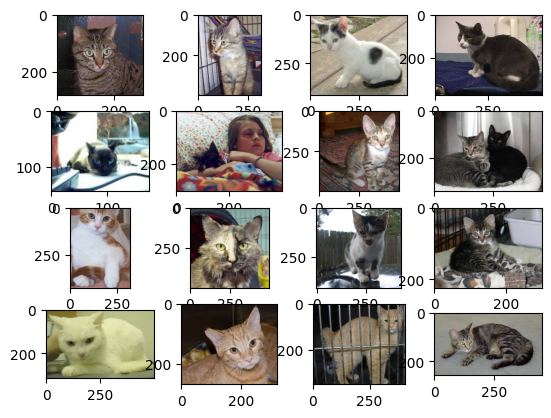

In [4]:
# print some cat images
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/training_set/cats/'

for i in range(16):
  plt.subplot(4, 4, i+1)
  filename = folder + 'cat.' + str(i+1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)

plt.show()


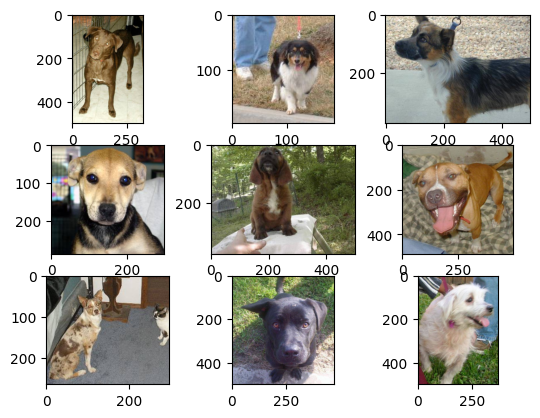

In [5]:
# print some dog images
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/training_set/dogs/'

for i in range(9):
  plt.subplot(3, 3, i+1)
  filename = folder + 'dog.' + str(i+1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)

plt.show()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 8005 files belonging to 2 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [9]:
class_names

['cats', 'dogs']

In [10]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
 )

Found 2023 files belonging to 2 classes.


In [11]:
# Normalize
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Create CNN Architecture

In [12]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs=7, validation_data=validation_ds)

Epoch 1/7
251/251 [==============================] - 37s 109ms/step - loss: 2.3143 - accuracy: 0.5711 - val_loss: 1.6053 - val_accuracy: 0.4938
Epoch 2/7
251/251 [==============================] - 27s 106ms/step - loss: 0.8152 - accuracy: 0.6299 - val_loss: 1.1668 - val_accuracy: 0.5591
Epoch 3/7
251/251 [==============================] - 29s 113ms/step - loss: 0.5985 - accuracy: 0.6836 - val_loss: 0.5831 - val_accuracy: 0.6911
Epoch 4/7
251/251 [==============================] - 27s 104ms/step - loss: 0.5326 - accuracy: 0.7289 - val_loss: 0.5755 - val_accuracy: 0.7227
Epoch 5/7
251/251 [==============================] - 29s 114ms/step - loss: 0.4704 - accuracy: 0.7679 - val_loss: 0.5883 - val_accuracy: 0.7311
Epoch 6/7
251/251 [==============================] - 29s 113ms/step - loss: 0.4032 - accuracy: 0.8006 - val_loss: 0.5958 - val_accuracy: 0.6886
Epoch 7/7
251/251 [==============================] - 29s 114ms/step - loss: 0.3672 - accuracy: 0.8189 - val_loss: 0.6723 - val_accuracy:

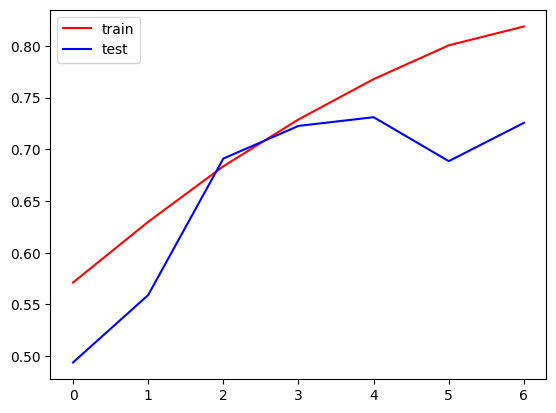

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

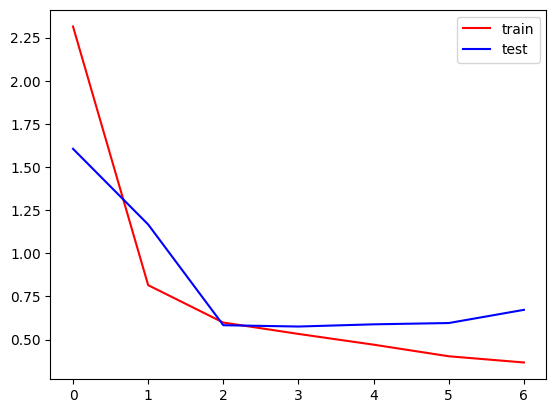

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

In [18]:
# accuracy
model.evaluate(train_ds)

251/251 [==============================] - 13s 52ms/step - loss: 0.4126 - accuracy: 0.8181


[0.41264522075653076, 0.8181136846542358]

In [19]:
# accuracy
model.evaluate(validation_ds)

64/64 [==============================] - 4s 62ms/step - loss: 0.6723 - accuracy: 0.7257


[0.6722541451454163, 0.7256549596786499]

In [20]:
# save the model
model.save('cat_dog_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import cv2

In [22]:
test_img = cv2.imread('/content/drive/MyDrive/CNN_FILES_DS_US/dog.jpeg')

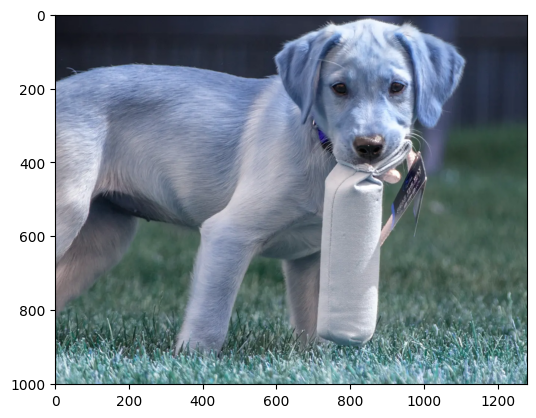

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(1002, 1280, 3)

In [25]:
test_img = cv2.resize(test_img, (256, 256))

In [26]:
test_img.shape

(256, 256, 3)

In [27]:
test_input = test_img.reshape((1, 256, 256, 3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 1s 595ms/step


array([[1.]], dtype=float32)